In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
df=pd.read_csv("USArrests.csv",index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

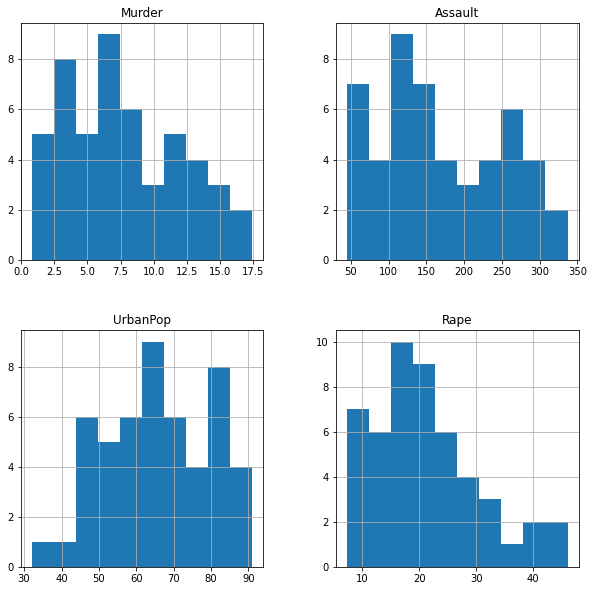

In [7]:
df.hist(figsize=(10,10))

In [8]:
kmeans=KMeans(n_clusters=4)

In [9]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\sevva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an i

In [10]:
k_fit=kmeans.fit(df)

In [11]:
k_fit.n_clusters

4

In [12]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [13]:
k_fit.labels_

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 1, 0, 1,
       3, 1, 0, 2, 2, 1, 3, 0, 1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 3, 0, 0, 2,
       3, 0, 0, 3, 3, 0])

In [14]:
# Kümeleme işlemini yaptık, görselleştirme yaparak gözlemleyelim
k_means=KMeans(n_clusters=2).fit(df)

In [15]:
kumeler=k_means.labels_

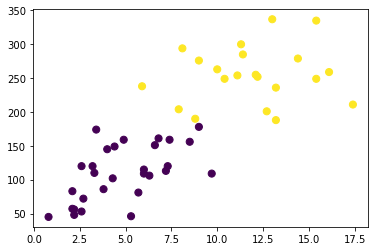

In [16]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis");

In [17]:
merkezler=k_means.cluster_centers_

In [18]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

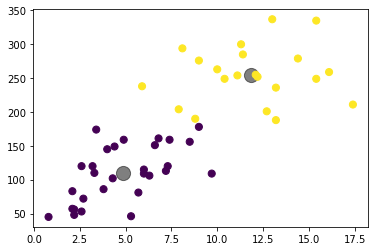

In [19]:
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5);
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis");

## K-Means için belirlenmesi gereken optimum küme sayısının hesaplanması 

### Elbow Yöntemi

In [20]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [21]:
ssd=[]

K=range(1,30)

for k in K:
    kmeans=KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

Text(0, 0.5, 'Optimum küme sayısı için Elbow Yöntemi ')

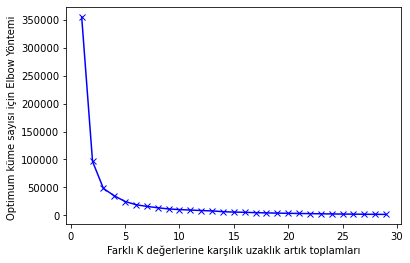

In [23]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K değerlerine karşılık uzaklık artık toplamları")
plt.ylabel("Optimum küme sayısı için Elbow Yöntemi ")

In [24]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [25]:
from yellowbrick.cluster import KElbowVisualizer

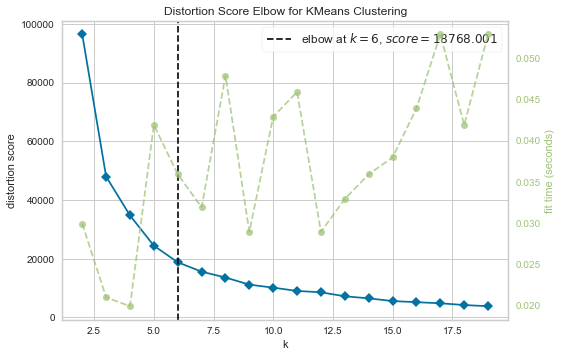

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(2,20))
visu.fit(df)
visu.poof()

In [31]:
kmeans=KMeans(n_clusters=visu.elbow_value_).fit(df)

In [32]:
kumeler=kmeans.labels_

In [33]:
pd.DataFrame({"Eyaletler":df.index,"Kumeler":kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,4
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,0
7,Delaware,1
8,Florida,4
9,Georgia,3


In [30]:
df["Kume_No"]=kumeler
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,5
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,4
Georgia,17.4,211,60,25.8,5
